In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.metrics import silhouette_score as sil


# import clustering libraries

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
import seaborn as sn
from sklearn.cluster import KMeans

In [2]:
cd=pd.read_csv('crimedata.csv')
cd

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
cd[cd.duplicated()] # Prints duplicated rows ( no duplicate rows found)

,States,Murder,Assault,UrbanPop,Rape


## Heirarchical Clustering

In [5]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(cd.iloc[:,1:]))
data  

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [6]:
from sklearn.cluster import AgglomerativeClustering 
c_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(data) 

cluster_la=pd.Series(c_complete.labels_)
cluster_la
cd['clust']=cluster_la # creating a  new column and assigning it existing data
cd

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


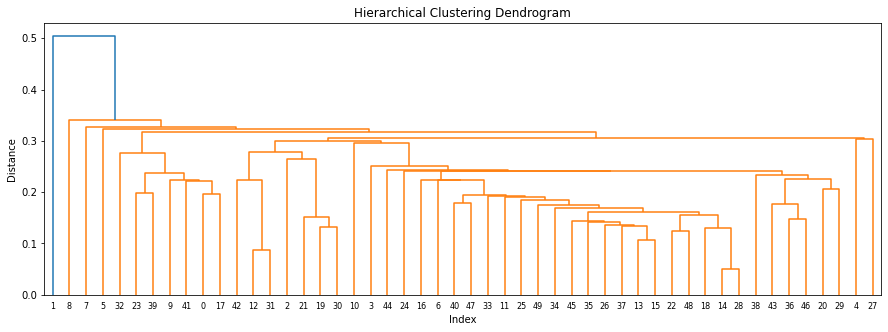

In [7]:
zc= linkage(data, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    zc,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()  

In [8]:
cd.iloc[:,1:].groupby(cd.clust).mean()   

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.715000,132.300000,70.800000,18.100000,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,3.180000,78.700000,49.300000,11.630000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


In [9]:
data0 = cd[(cd.clust==0)]
data0

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
22,Minnesota,2.7,72,66,14.9,0
29,New Jersey,7.4,159,89,18.8,0


In [10]:
data1 = cd[(cd.clust==1)]
data1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [11]:
data2 = cd[(cd.clust==2)]
data2

,States,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [12]:
data3 = cd[(cd.clust==3)]
data3

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [13]:
data4 = cd[(cd.clust==4)]
data4

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,4


In [14]:
cd.groupby(["clust"])["UrbanPop"].apply(lambda x:tuple(x))

clust
0    (50, 77, 72, 83, 65, 66, 52, 85, 66, 89, 75, 6...
1     (80, 91, 78, 80, 83, 67, 74, 70, 81, 70, 86, 80)
2             (54, 57, 51, 53, 62, 56, 44, 45, 32, 39)
3                         (58, 60, 66, 44, 45, 48, 59)
4                                                (48,)
Name: UrbanPop, dtype: object

## K-Means

In [15]:
kd=pd.read_csv('crimedata.csv')
kd

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [16]:
from sklearn.preprocessing import StandardScaler
scalerc= StandardScaler()
scaled_kd=scalerc.fit_transform(kd.iloc[:,1:])

In [17]:
kmeans=KMeans(n_clusters=3, random_state=42) # to create the model
kmeans.fit(scaled_kd) # putting the scaled data within the model

KMeans(n_clusters=3, random_state=42)

In [18]:
kmeans.inertia_ # this tell the wcss (within cluster sum-of-squares)

80.08569526137276

In [19]:
wcss=[]
for i in range(1, 6): # to find for which value of K (from 1 to 5) we have the best wcss value(inertia_)
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_kd)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

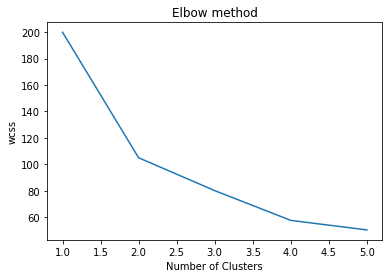

In [20]:
plt.plot(range(1,6),wcss)
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show

In [21]:
kmeans.labels_

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [22]:
# Assign cluster to the dataset by creating new column 
kd['clusterid']=kmeans.labels_ 

In [23]:
kd

,States,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [24]:
kd.groupby('clusterid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid,,,,
0,5.036364,138.727273,78.181818,18.654545
1,10.815385,257.384615,76.000000,33.192308
2,7.100000,134.000000,59.888889,18.222222
3,14.671429,251.285714,54.285714,21.685714
4,2.680000,70.100000,51.000000,10.910000


In [25]:
kd[kd['clusterid'] ==0]

,States,Murder,Assault,UrbanPop,Rape,clusterid
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
36,Oregon,4.9,159,67,29.3,0
37,Pennsylvania,6.3,106,72,14.9,0
38,Rhode Island,3.4,174,87,8.3,0
43,Utah,3.2,120,80,22.9,0


In [26]:
kd[kd['clusterid'] ==1]

,States,Murder,Assault,UrbanPop,Rape,clusterid
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [27]:
kd[kd['clusterid'] ==2]

,States,Murder,Assault,UrbanPop,Rape,clusterid
3,Arkansas,8.8,190,50,19.5,2
13,Indiana,7.2,113,65,21.0,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
35,Oklahoma,6.6,151,68,20.0,2
45,Virginia,8.5,156,63,20.7,2
49,Wyoming,6.8,161,60,15.6,2


In [28]:
kd[kd['clusterid'] ==3]

,States,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [29]:
kd[kd['clusterid'] ==4]

,States,Murder,Assault,UrbanPop,Rape,clusterid
11,Idaho,2.6,120,54,14.2,4
14,Iowa,2.2,56,57,11.3,4
18,Maine,2.1,83,51,7.8,4
22,Minnesota,2.7,72,66,14.9,4
28,New Hampshire,2.1,57,56,9.5,4
33,North Dakota,0.8,45,44,7.3,4
40,South Dakota,3.8,86,45,12.8,4
44,Vermont,2.2,48,32,11.2,4
47,West Virginia,5.7,81,39,9.3,4
48,Wisconsin,2.6,53,66,10.8,4


## DBSCAN

In [30]:
dbd=pd.read_csv('crimedata.csv')
dbd

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [31]:
#dbd['States']=dbd['States'].astype('category') # will convert Column to category
#dbd['States']=dbd['States'].cat.codes # Encoding the States column

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crimed= pd.DataFrame(scaler.fit_transform(dbd.iloc[:,1:5]))
crimed

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [33]:
array=crimed.values
array

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [34]:
stscaler=StandardScaler().fit(array)
Xi=stscaler.transform(array)
Xi

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [35]:
from sklearn.neighbors import NearestNeighbors
# to find the optimal eps value
neigh=NearestNeighbors (n_neighbors=5)
nbr=neigh.fit(Xi)
distances, indices = nbr.kneighbors(Xi)

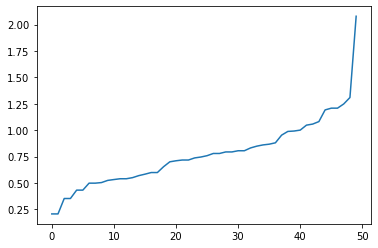

In [36]:
distances =np.sort(distances, axis=0)
distances =  distances[:,1]
plt.plot(distances)
# from the below curve we can say eps is 1.25 as the curve starts to bend around that point.

In [37]:
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=1.25, min_samples=5) # min samples is taken at random as the number of features is 4 so the min sam could be 2*4 or 3*4
dbscan.fit(Xi)

DBSCAN(eps=1.25)

In [38]:
dbscan.labels_ 

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [39]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [40]:
clustered=pd.concat([dbd,cl],axis=1)

In [41]:
clustered

,States,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


Text(0.5, 1.0, 'Clusters using DBScan')

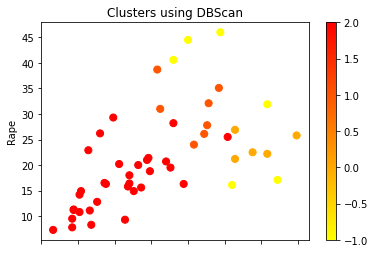

In [49]:
 clustered.plot(x="Murder",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.autumn_r) 
plt.title('Clusters using DBScan') # we can see homogenous clusters with less overlapping

Text(0.5, 1.0, 'Clusters using DBScan')

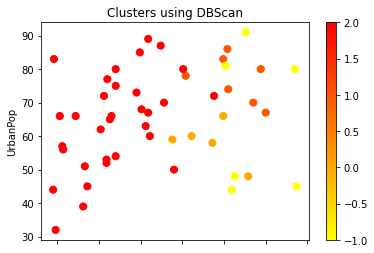

In [50]:
 clustered.plot(x="Assault",y ="UrbanPop",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.autumn_r) 
plt.title('Clusters using DBScan') # we can see homogenous clusters with less overlapping

In [51]:
clustered[clustered['cluster'] ==0]

,States,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [52]:
clustered[clustered['cluster'] ==1]

,States,Murder,Assault,UrbanPop,Rape,cluster
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [53]:
clustered[clustered['cluster'] ==2]

,States,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


In [54]:
clustered.groupby('cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
-1,12.616667,287.000,64.833333,32.700000
0,14.720000,232.600,58.200000,23.720000
1,10.328571,263.000,76.857143,30.685714
2,5.243750,119.125,64.343750,16.625000


In [42]:
dl=dbscan.labels_

In [43]:
# Silhouette score for DBSCAN
sklearn.metrics.silhouette_score(Xi, dl) 

0.23869670053300915

In [44]:
# Silhouette score for the Hierarical clustering
noc=[2,3,4,5]
sc_score=[]    
for i in noc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(crimed.iloc[:,:6])
    sc_score.append(sil(crimed.iloc[:,:6],y))

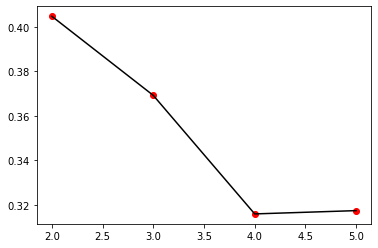

In [45]:
plt.plot(noc,sc_score,color="black")
plt.scatter(noc,sc_score,color="red")
plt.show()

In [57]:
# Silhouette score for the KMeans clustering
vc=[2,3,4,5]
kc_score=[]    
for i in vc:
    km1 = KMeans(n_clusters=i, random_state=42,)

    jo=km1.fit_predict(crimed.iloc[:,:6])
    kc_score.append(sil(crimed.iloc[:,:6],jo))

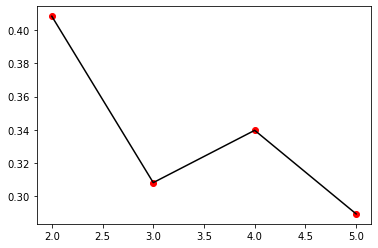

In [58]:
plt.plot(vc,kc_score,color="black")
plt.scatter(vc,kc_score,color="red")
plt.show()

## Conclusion
### From the above we can see that cluster 2 has the least crime rate as compared to other clusters in the Heirarchical clustering model.

### In K-Means we can see that cluster 1 has the least crime rate as compared to other clusters.

### In DBSCAN we can see that cluster 2 has the least crime rate as compared to other clusters.

### As per the Silhouette score we getting K-Means clustering as the better model and the optimum number of clusters is 2 as per the elbow method and Silhouette score. 